# Exemplos funções para dataframe

In [2]:
import sys
import os
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

filepath=os.path.join("..","02.codigo")
sys.path.append(filepath)

from funcoes_dataframe import *
from funcoes_plot import *

%reload_ext autoreload
%autoreload 2

In [3]:
TIPO_DE_COMPRESSAO = 'gzip'

In [4]:
diretorio_leitura = os.path.join("..","03.dataset")

In [5]:
df = pd.read_csv(os.path.join(diretorio_leitura, "df.csv.gz"), compression=TIPO_DE_COMPRESSAO, parse_dates=['Date'], index_col=0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5437 entries, 2003-10-16 to 2019-10-18
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Vazao OQ 1 (11FC50.PV)                    5437 non-null   float64
 1   Vazao OQ 2 (11FC52.PV)                    5437 non-null   float64
 2   Vazao OQ 3 (11FC55.PV)                    5437 non-null   float64
 3   Pressao torre (11PC53.PV)                 5437 non-null   float64
 4   HCs Totais AP (11SC501_HC.L)              2946 non-null   float64
 5   Cloreto (purga) (11SC50_CL.L)             2946 non-null   float64
 6   pH (purga) (11SC50_PH.L)                  5436 non-null   float64
 7   Temperatura OQ saida 11T15 (11TR0001.AO)  5437 non-null   float64
 8   Temperatura topo torre (11TR0023.AO)      5437 non-null   float64
 9   Temperatura OQ entrada (11TR28.AO)        5437 non-null   float64
 10  Cp tubo           

In [7]:
df.head()

,Vazao OQ 1 (11FC50.PV),Vazao OQ 2 (11FC52.PV),Vazao OQ 3 (11FC55.PV),Pressao torre (11PC53.PV),HCs Totais AP (11SC501_HC.L),Cloreto (purga) (11SC50_CL.L),pH (purga) (11SC50_PH.L),Temperatura OQ saida 11T15 (11TR0001.AO),Temperatura topo torre (11TR0023.AO),Temperatura OQ entrada (11TR28.AO),Cp tubo,Vazao tubo,Vazao casco,Calor Trocado
Date,,,,,,,,,,,,,,
2003-10-16,1916.08,2457.67,1511.83,5.80006,NaN,NaN,9.3483,180.429,163.911,194.604,0.477626,5885.58,805.785892,3.984739e+07
2003-10-17,2084.93,2796.98,1241.54,5.79994,NaN,NaN,9.0417,182.046,163.934,196.950,0.478897,6123.45,883.846684,4.370602e+07
2003-10-18,1974.71,2838.89,1528.87,5.79958,NaN,NaN,8.8500,180.357,163.921,193.208,0.477155,6342.47,786.468084,3.889147e+07
2003-10-19,2124.84,2860.31,1530.31,5.79904,NaN,NaN,8.9371,179.562,163.944,193.478,0.476986,6515.46,874.596738,4.324792e+07
2003-10-20,2163.21,2810.20,1528.71,5.79962,NaN,NaN,8.9883,178.295,163.910,192.371,0.476224,6502.12,881.383546,4.358588e+07


### Tipos de plot

[1 - Função obter correlation](#1p) |
[2 - Funcao para min max por quartil](#2p) |
[3 - Remover outlier por quatis por tag](#3p) |
[4 - Criar variável para dataframe com shift por janela](#4p) |
[5 - Criar variável para dataframe com media ponderada por janela](#5p) |
[6 - Interpolar os dados por janela](#6p) |
[7 - Criar dataframe por media movel por janela](#7p) |
[8 - Criar variavel contagem de dias por janela Ascendente](#8p) |
[9 - Criar variavel contagem de dias por janela Descendente](#9p) 

***
<a id='1p'></a>
### 1 - Função obter correlation

In [8]:
#tipo_retorno = 0 >> colunas com correlação alta.
#tipo_retorno = 1 >> colunas sem correlação.
#tipo_retorno = 2 >> dataframe sem correlação.

In [9]:
col_alta = obter_correlation(df, min_threshold=-0.8, max_threshold=0.8, tipo_retorno=0)
col_alta

{'Calor Trocado',
 'Cp tubo',
 'Temperatura OQ entrada (11TR28.AO)',
 'Vazao tubo'}

In [10]:
col_sc = obter_correlation(df, min_threshold=-0.8, max_threshold=0.8, tipo_retorno=1)
col_sc

['Vazao OQ 1 (11FC50.PV)',
 'Vazao OQ 2 (11FC52.PV)',
 'Vazao OQ 3 (11FC55.PV)',
 'Pressao torre (11PC53.PV)',
 'HCs Totais AP (11SC501_HC.L)',
 'Cloreto (purga) (11SC50_CL.L)',
 'pH (purga) (11SC50_PH.L)',
 'Temperatura OQ saida 11T15 (11TR0001.AO)',
 'Temperatura topo torre (11TR0023.AO)',
 'Vazao casco']

In [11]:
df_s = obter_correlation(df, min_threshold=-0.8, max_threshold=0.8, tipo_retorno=2)
df_s.head()

,Vazao OQ 1 (11FC50.PV),Vazao OQ 2 (11FC52.PV),Vazao OQ 3 (11FC55.PV),Pressao torre (11PC53.PV),HCs Totais AP (11SC501_HC.L),Cloreto (purga) (11SC50_CL.L),pH (purga) (11SC50_PH.L),Temperatura OQ saida 11T15 (11TR0001.AO),Temperatura topo torre (11TR0023.AO),Vazao casco
Date,,,,,,,,,,
2003-10-16,1916.08,2457.67,1511.83,5.80006,NaN,NaN,9.3483,180.429,163.911,805.785892
2003-10-17,2084.93,2796.98,1241.54,5.79994,NaN,NaN,9.0417,182.046,163.934,883.846684
2003-10-18,1974.71,2838.89,1528.87,5.79958,NaN,NaN,8.8500,180.357,163.921,786.468084
2003-10-19,2124.84,2860.31,1530.31,5.79904,NaN,NaN,8.9371,179.562,163.944,874.596738
2003-10-20,2163.21,2810.20,1528.71,5.79962,NaN,NaN,8.9883,178.295,163.910,881.383546


***
<a id='2p'></a>
### 2 - Funcao para min max por quartil

In [12]:
outlier_quartis_df(df, percentual=1.5, q1=0.25, q3=0.75)

Min: 578.93  -  Max: 2651.86  -  Vazao OQ 1 (11FC50.PV)
Min: 419.43  -  Max: 3323.75  -  Vazao OQ 2 (11FC52.PV)
Min: 803.93  -  Max: 2520.25  -  Vazao OQ 3 (11FC55.PV)
Min: 5.45  -  Max: 6.65  -  Pressao torre (11PC53.PV)
Min: -9.30  -  Max: 15.50  -  HCs Totais AP (11SC501_HC.L)
Min: -3.20  -  Max: 6.40  -  Cloreto (purga) (11SC50_CL.L)
Min: 8.35  -  Max: 10.35  -  pH (purga) (11SC50_PH.L)
Min: 171.69  -  Max: 185.98  -  Temperatura OQ saida 11T15 (11TR0001.AO)
Min: 161.84  -  Max: 167.59  -  Temperatura topo torre (11TR0023.AO)
Min: 184.76  -  Max: 199.72  -  Temperatura OQ entrada (11TR28.AO)
Min: 0.47  -  Max: 0.48  -  Cp tubo
Min: 3448.43  -  Max: 6807.20  -  Vazao tubo
Min: 394.31  -  Max: 924.76  -  Vazao casco
Min: 19313459.87  -  Max: 45787413.15  -  Calor Trocado


***
<a id='3p'></a>
### 3 - Remover outlier por quatis por tag

In [13]:
df_q = outlier_quartis_janela(df, 
                              ['Vazao OQ 1 (11FC50.PV)','Vazao OQ 3 (11FC55.PV)'],
                              delta=90, percentual=1.5, q1=0.25, q3=0.75)

Vazao OQ 1 (11FC50.PV)
Vazao OQ 3 (11FC55.PV)


(5435, 14)


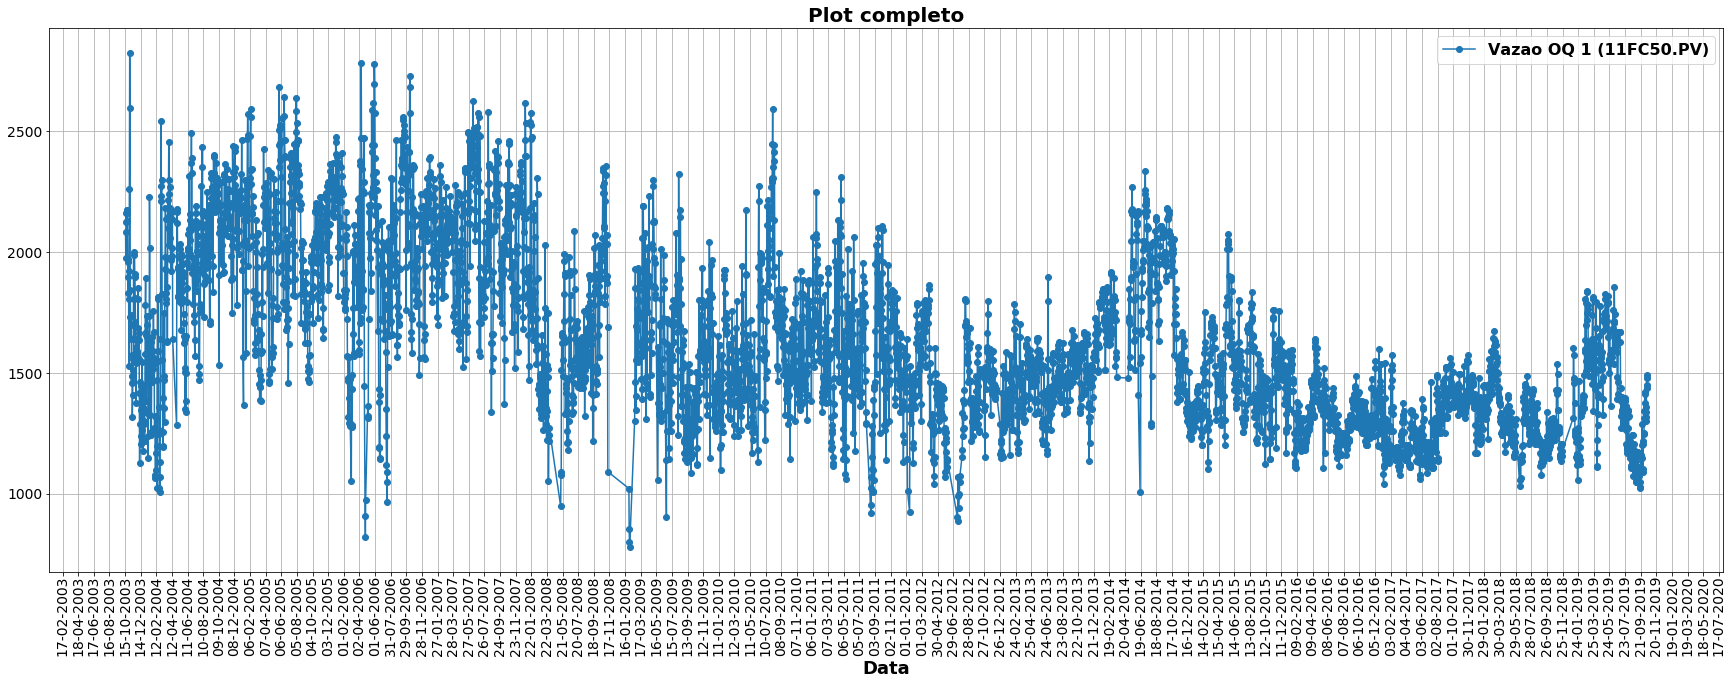

(5056, 14)


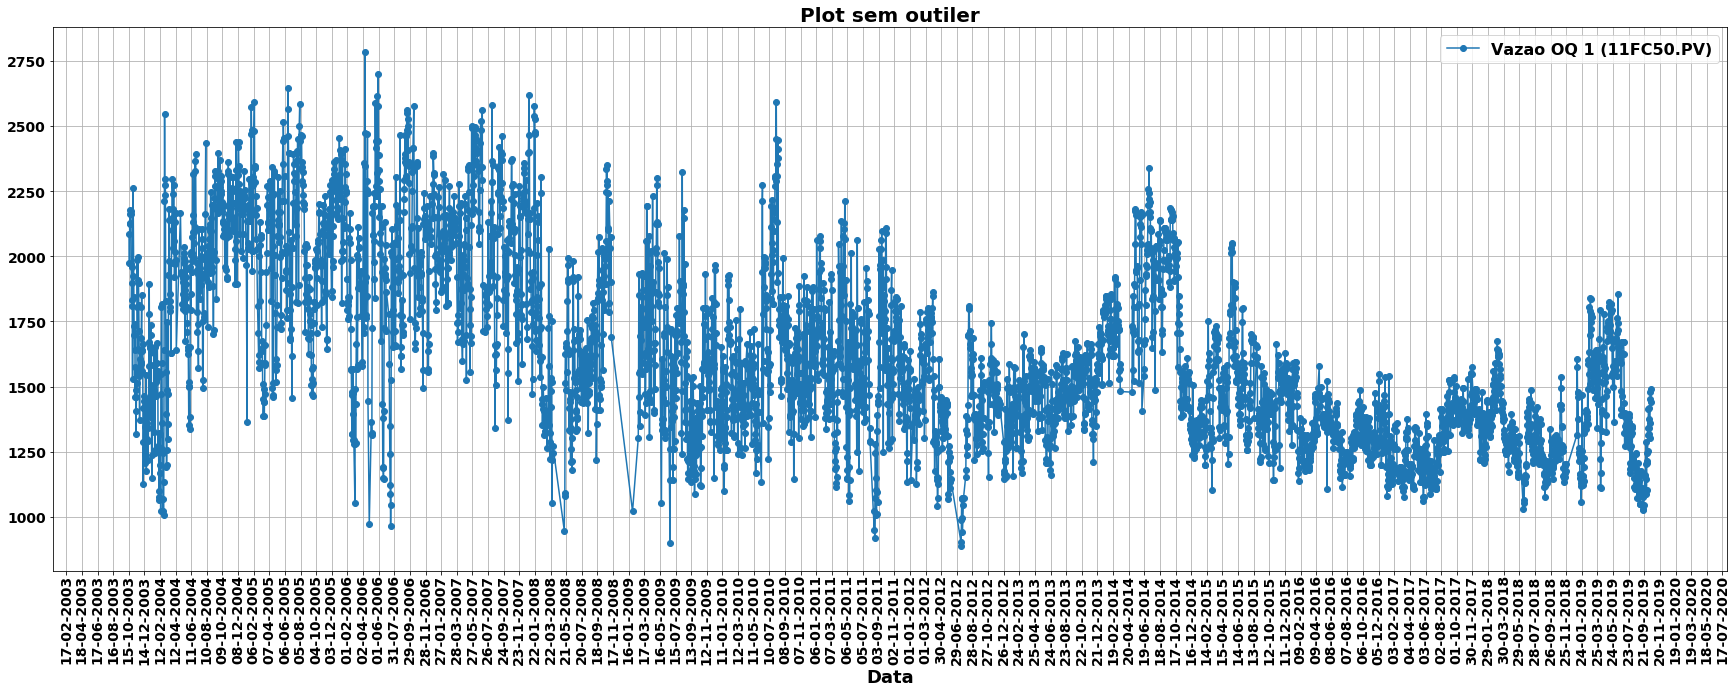

In [14]:
ini = df.index.min()
fim = df.index.max()

params = {
    'days_interval':60,
    'titulo': 'Plot completo',
}

plot_full(df, ['Vazao OQ 1 (11FC50.PV)'] , ini, fim, **params);
params = {
    'days_interval':60,
    'titulo': 'Plot sem outiler',
}
plot_full(df_q, ['Vazao OQ 1 (11FC50.PV)'] , ini, fim, **params);

***
<a id='4p'></a>
### 4 - Criar variável para dataframe com shift por janela

In [15]:
janelas_ini_fim = {(df.index.min(),'2014-05-01 00:00:00'),('2014-05-02 00:00:00',df.index.max())}
tags_shift_x = ['Vazao OQ 1 (11FC50.PV)','Vazao OQ 3 (11FC55.PV)']
valores_freq_x = [4,2,-3]

df_new, nome_cols = montar_entrada_shift(df, janelas_ini_fim, tags_shift_x, valores_freq_x, drop=False, f='D')

In [16]:
nome_cols

['Vazao OQ 1 (11FC50.PV) (T_D-3)',
 'Vazao OQ 1 (11FC50.PV) (T_D2)',
 'Vazao OQ 1 (11FC50.PV) (T_D4)',
 'Vazao OQ 3 (11FC55.PV) (T_D-3)',
 'Vazao OQ 3 (11FC55.PV) (T_D2)',
 'Vazao OQ 3 (11FC55.PV) (T_D4)']

In [17]:
df_new

,Vazao OQ 1 (11FC50.PV),Vazao OQ 2 (11FC52.PV),Vazao OQ 3 (11FC55.PV),Pressao torre (11PC53.PV),HCs Totais AP (11SC501_HC.L),Cloreto (purga) (11SC50_CL.L),pH (purga) (11SC50_PH.L),Temperatura OQ saida 11T15 (11TR0001.AO),Temperatura topo torre (11TR0023.AO),Temperatura OQ entrada (11TR28.AO),Cp tubo,Vazao tubo,Vazao casco,Calor Trocado,Vazao OQ 1 (11FC50.PV) (T_D4),Vazao OQ 1 (11FC50.PV) (T_D2),Vazao OQ 1 (11FC50.PV) (T_D-3),Vazao OQ 3 (11FC55.PV) (T_D4),Vazao OQ 3 (11FC55.PV) (T_D2),Vazao OQ 3 (11FC55.PV) (T_D-3)
Date,,,,,,,,,,,,,,,,,,,,
2014-05-03,1478.46,1479.61,1413.48,6.00449,5.328,3.40,9.2,175.695,164.107,191.341,0.475060,4371.55,657.268154,3.249279e+07,NaN,NaN,1709.39,NaN,NaN,1385.42
2014-05-04,1731.45,1570.20,1487.98,6.00150,5.328,3.40,9.2,175.973,164.098,190.701,0.474944,4789.63,677.699424,3.350331e+07,NaN,NaN,1719.33,NaN,NaN,1368.34
2014-05-05,1847.96,1717.93,1323.67,5.88439,5.328,3.40,9.2,176.748,163.481,192.945,0.475912,4889.56,761.646408,3.769044e+07,NaN,1478.46,1564.06,NaN,1413.48,1606.17
2014-05-06,1709.39,1658.01,1385.42,5.79940,5.328,3.40,9.2,175.000,163.095,191.738,0.474964,4752.82,763.082358,3.778467e+07,NaN,1731.45,1522.75,NaN,1487.98,1557.99
2014-05-07,1719.33,1602.83,1368.34,5.80062,5.328,3.40,9.2,174.187,163.078,190.171,0.474200,4690.50,717.977048,3.555221e+07,1478.46,1847.96,1703.16,1413.48,1323.67,1575.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-03-15,1560.96,1833.69,1321.62,6.10695,5.328,0.15,9.2,182.746,164.449,191.538,0.477385,4716.27,400.634588,1.979499e+07,1750.56,1721.42,1567.20,1053.13,1186.16,1360.73
2014-03-16,1718.27,1816.91,1226.85,5.94813,5.328,0.15,9.2,179.109,163.515,187.054,0.474780,4762.03,363.014322,1.796297e+07,1800.57,1528.06,1481.13,1102.13,1248.04,1326.85
2014-03-17,1585.16,1839.26,1327.03,5.84983,5.328,0.15,9.2,176.474,162.932,185.318,0.473377,4751.45,401.629438,1.989217e+07,1721.42,1560.96,NaN,1186.16,1321.62,NaN


***
<a id='5p'></a>
### 5 - Criar variável para dataframe com media ponderada por janela

In [18]:
janelas_ini_fim = {(df.index.min(),'2014-05-01 00:00:00'),('2014-05-02 00:00:00',df.index.max())}
tags_media_x = ['Vazao OQ 1 (11FC50.PV)','Vazao OQ 3 (11FC55.PV)']
tamanhos_janela = [5,10]

df_new = montar_entrada_media_ponderada(df, janelas_ini_fim, 
                                        tags_media_x, 
                                        tamanhos_janela, 
                                        label_index='Date', drop=False, freq='D')

In [19]:
df.isna().sum()

Vazao OQ 1 (11FC50.PV)                         0
Vazao OQ 2 (11FC52.PV)                         0
Vazao OQ 3 (11FC55.PV)                         0
Pressao torre (11PC53.PV)                      0
HCs Totais AP (11SC501_HC.L)                2491
Cloreto (purga) (11SC50_CL.L)               2491
pH (purga) (11SC50_PH.L)                       1
Temperatura OQ saida 11T15 (11TR0001.AO)       0
Temperatura topo torre (11TR0023.AO)           0
Temperatura OQ entrada (11TR28.AO)             0
Cp tubo                                        0
Vazao tubo                                     0
Vazao casco                                    0
Calor Trocado                                  0
dtype: int64

In [20]:
df_new.isna().sum()

Vazao OQ 1 (11FC50.PV)                         0
Vazao OQ 2 (11FC52.PV)                         0
Vazao OQ 3 (11FC55.PV)                         0
Pressao torre (11PC53.PV)                      0
HCs Totais AP (11SC501_HC.L)                2491
Cloreto (purga) (11SC50_CL.L)               2491
pH (purga) (11SC50_PH.L)                       1
Temperatura OQ saida 11T15 (11TR0001.AO)       0
Temperatura topo torre (11TR0023.AO)           0
Temperatura OQ entrada (11TR28.AO)             0
Cp tubo                                        0
Vazao tubo                                     0
Vazao casco                                    0
Calor Trocado                                  0
Vazao OQ 1 (11FC50.PV) (MP_D5)                19
Vazao OQ 1 (11FC50.PV) (MP_D10)               12
Vazao OQ 3 (11FC55.PV) (MP_D5)                19
Vazao OQ 3 (11FC55.PV) (MP_D10)               12
dtype: int64

In [21]:
df_new = montar_entrada_media_ponderada(df, janelas_ini_fim, 
                                        tags_media_x, 
                                        tamanhos_janela, 
                                        label_index='Date', drop=True, freq='D')

In [22]:
df_new.isna().sum()

Vazao OQ 1 (11FC50.PV)                      0
Vazao OQ 2 (11FC52.PV)                      0
Vazao OQ 3 (11FC55.PV)                      0
Pressao torre (11PC53.PV)                   0
HCs Totais AP (11SC501_HC.L)                0
Cloreto (purga) (11SC50_CL.L)               0
pH (purga) (11SC50_PH.L)                    0
Temperatura OQ saida 11T15 (11TR0001.AO)    0
Temperatura topo torre (11TR0023.AO)        0
Temperatura OQ entrada (11TR28.AO)          0
Cp tubo                                     0
Vazao tubo                                  0
Vazao casco                                 0
Calor Trocado                               0
Vazao OQ 1 (11FC50.PV) (MP_D5)              0
Vazao OQ 1 (11FC50.PV) (MP_D10)             0
Vazao OQ 3 (11FC55.PV) (MP_D5)              0
Vazao OQ 3 (11FC55.PV) (MP_D10)             0
dtype: int64

***
<a id='6p'></a>
### 6 - Interpolar os dados por janela

In [23]:
janelas_ini_fim = {(df.index.min(),'2014-05-01 00:00:00'),('2014-05-02 00:00:00',df.index.max())}

df_new = resample_interpolate_por_janela(df, janelas_ini_fim, freq="D", drop=True, method='linear')

In [24]:
df.isna().sum()

Vazao OQ 1 (11FC50.PV)                         0
Vazao OQ 2 (11FC52.PV)                         0
Vazao OQ 3 (11FC55.PV)                         0
Pressao torre (11PC53.PV)                      0
HCs Totais AP (11SC501_HC.L)                2491
Cloreto (purga) (11SC50_CL.L)               2491
pH (purga) (11SC50_PH.L)                       1
Temperatura OQ saida 11T15 (11TR0001.AO)       0
Temperatura topo torre (11TR0023.AO)           0
Temperatura OQ entrada (11TR28.AO)             0
Cp tubo                                        0
Vazao tubo                                     0
Vazao casco                                    0
Calor Trocado                                  0
dtype: int64

In [25]:
df_new.isna().sum()

Vazao OQ 1 (11FC50.PV)                      0
Vazao OQ 2 (11FC52.PV)                      0
Vazao OQ 3 (11FC55.PV)                      0
Pressao torre (11PC53.PV)                   0
HCs Totais AP (11SC501_HC.L)                0
Cloreto (purga) (11SC50_CL.L)               0
pH (purga) (11SC50_PH.L)                    0
Temperatura OQ saida 11T15 (11TR0001.AO)    0
Temperatura topo torre (11TR0023.AO)        0
Temperatura OQ entrada (11TR28.AO)          0
Cp tubo                                     0
Vazao tubo                                  0
Vazao casco                                 0
Calor Trocado                               0
dtype: int64

***
<a id='7p'></a>
### 7 - Criar dataframe por media movel por janela

In [26]:
janelas_ini_fim = {(df.index.min(),'2014-05-01 00:00:00'),('2014-05-02 00:00:00',df.index.max())}
rolling_time = 10

df_new = rolling_time_por_janela(df, janelas_ini_fim, rolling_time, drop=False)

In [27]:
df_new

,Vazao OQ 1 (11FC50.PV),Vazao OQ 2 (11FC52.PV),Vazao OQ 3 (11FC55.PV),Pressao torre (11PC53.PV),HCs Totais AP (11SC501_HC.L),Cloreto (purga) (11SC50_CL.L),pH (purga) (11SC50_PH.L),Temperatura OQ saida 11T15 (11TR0001.AO),Temperatura topo torre (11TR0023.AO),Temperatura OQ entrada (11TR28.AO),Cp tubo,Vazao tubo,Vazao casco,Calor Trocado
Date,,,,,,,,,,,,,,
2003-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-10-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-10-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-10-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-14,1363.542,1402.283,1871.387,6.155635,3.730349e-15,0.09,9.37405,175.5285,164.7988,187.2693,0.473700,4637.212,522.367874,2.579549e+07
2019-10-15,1377.180,1400.009,1863.120,6.155936,3.730349e-15,0.09,9.48205,175.6000,164.8257,187.5247,0.473805,4640.309,531.089982,2.622515e+07
2019-10-16,1394.911,1399.196,1852.188,6.150727,3.730349e-15,0.09,9.59005,175.7412,164.8368,187.9368,0.473982,4646.295,543.993165,2.686214e+07


***
<a id='8p'></a>
### 8 - Criar variavel contagem de dias por janela Ascendente

In [28]:
janelas_ini_fim = {(df.index.min(),'2014-05-01 00:00:00'),('2014-05-02 00:00:00',df.index.max())}

df_new = label_dias_ascendente(df, janelas_ini_fim, nome_tag='dias')

(5435, 15)


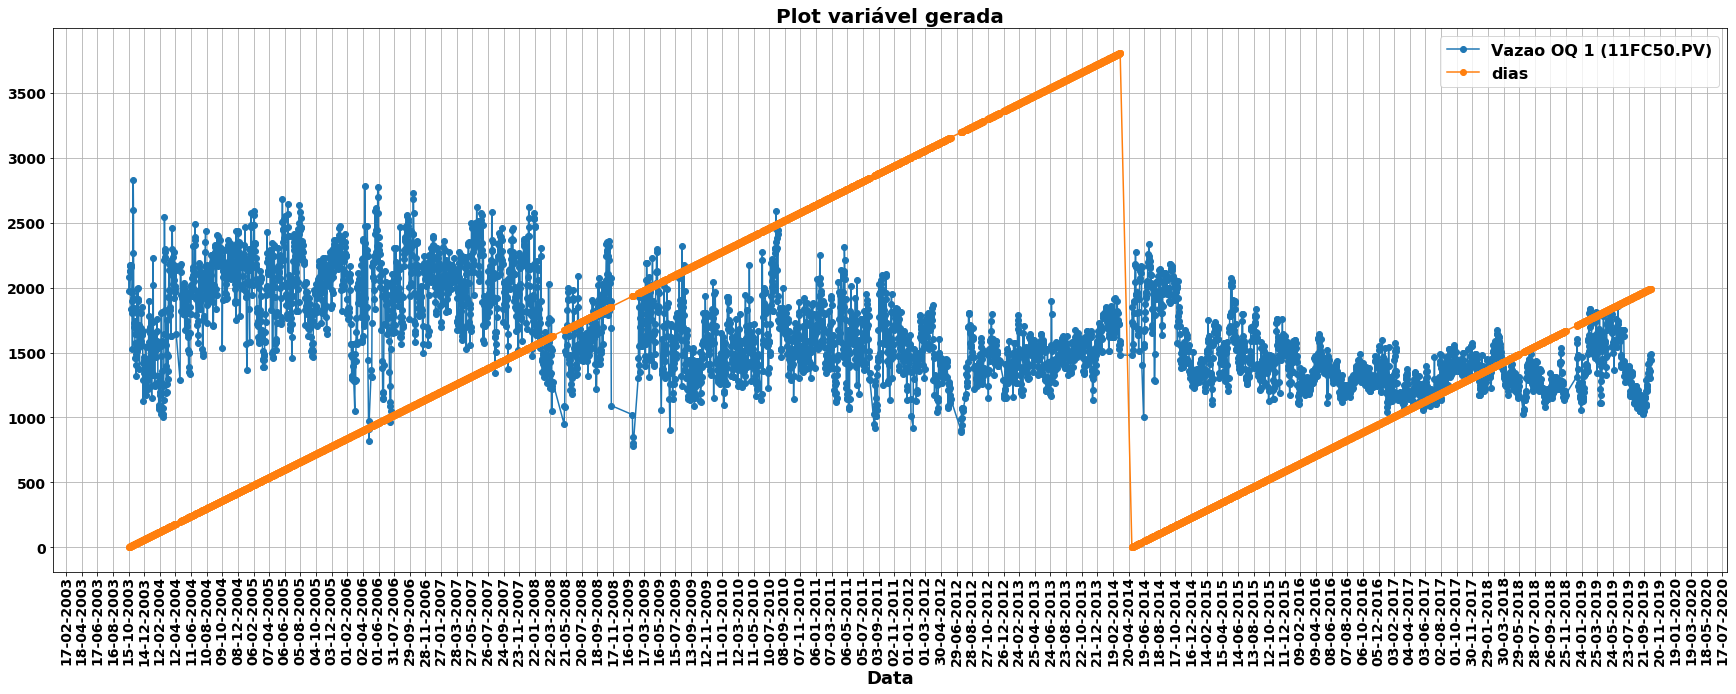

In [29]:
ini = df_new.index.min()
fim = df_new.index.max()

params = {
    'days_interval':60,
    'titulo': 'Plot variável gerada',
}
plot_full(df_new.sort_index(), ['Vazao OQ 1 (11FC50.PV)','dias'] , ini, fim, **params);

***
<a id='9p'></a>
### 9 - Criar variavel contagem de dias por janela Descendente

In [30]:
janelas_ini_fim = {(df.index.min(),'2014-05-01 00:00:00'),('2014-05-02 00:00:00',df.index.max())}
media_tempo = 4000

df_new = label_dias_descendente(df, janelas_ini_fim, media_tempo, nome_tag='dias')

(5435, 15)


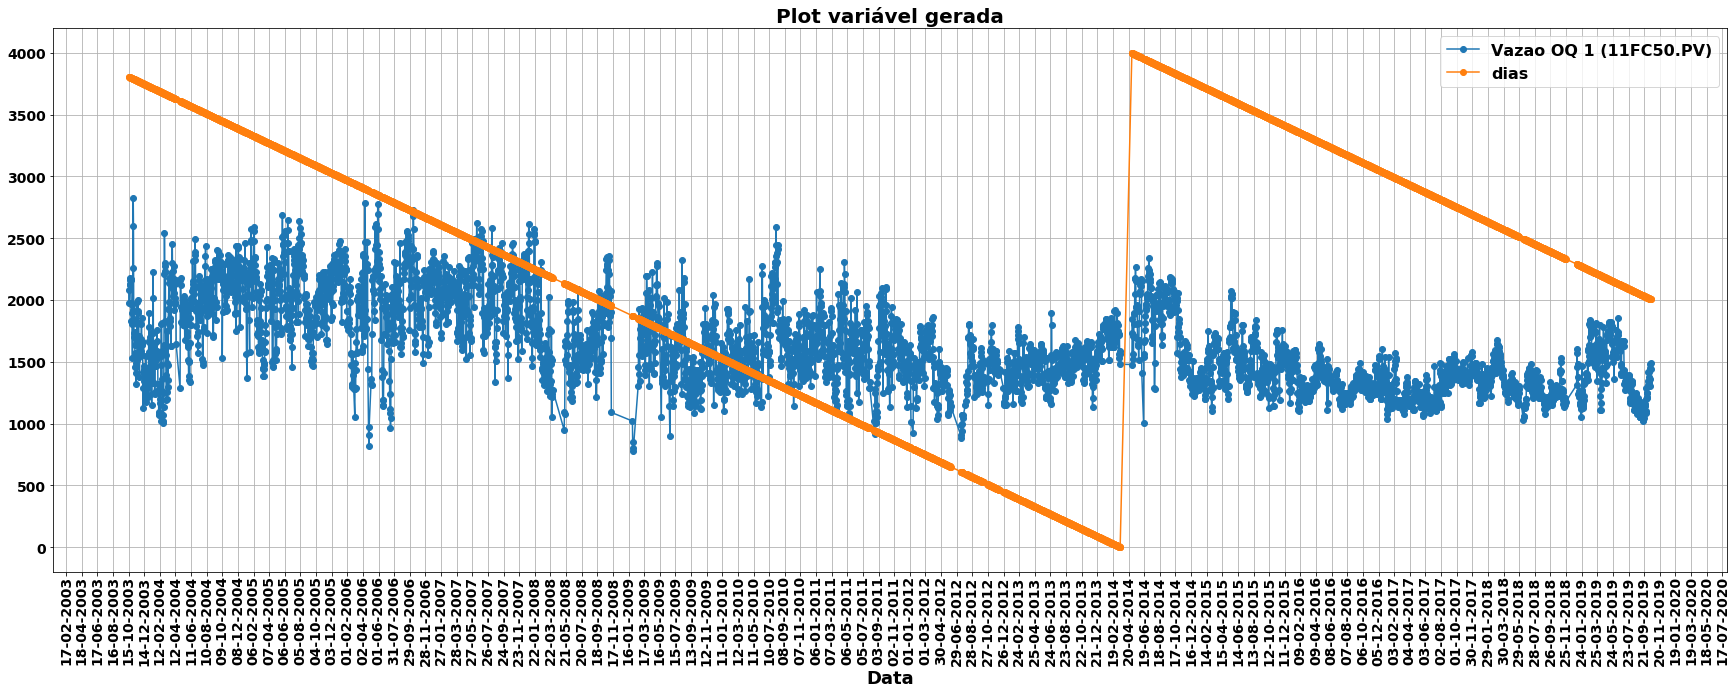

In [31]:
ini = df_new.index.min()
fim = df_new.index.max()

params = {
    'days_interval':60,
    'titulo': 'Plot variável gerada',
}
plot_full(df_new, ['Vazao OQ 1 (11FC50.PV)', 'dias'] , ini, fim, **params);